In [1]:
import os

import pandas as pd
import lightgbm as lgb
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
import time

from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn import svm
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [2]:
df = pd.read_csv('./preprocessed_apartment.csv')
df.head()

,city,district,dong,apartment,m2,price,floor,pre_m2,moving_date,num_people,people_by_m2,price_by_m2,price_by_pre_m2,year,month
0,8,1,1156,1504,196.21,450000.0,13.0,211.23,1976.06,480.0,120.0,7582.0,7043.0,2018,12
1,8,1,1706,4942,202.58,450000.0,5.0,252.31,2010.07,19.0,1.0,7343.0,5896.0,2018,12
2,8,1,1156,9746,139.83,320000.0,7.0,165.29,1982.04,1924.0,168.0,7565.0,6400.0,2018,12
3,8,1,393,15322,191.04,315000.0,2.0,219.22,1983.12,1204.0,84.0,5451.0,4750.0,2018,12
4,8,1,1156,1509,144.20,304000.0,10.0,158.68,1979.05,560.0,168.0,6969.0,6333.0,2018,12


In [3]:
df.shape

(6174900, 15)

In [4]:
df = df.sample(n=15000)
print(df.shape)
df.head()

(15000, 15)


,city,district,dong,apartment,m2,price,floor,pre_m2,moving_date,num_people,people_by_m2,price_by_m2,price_by_pre_m2,year,month
4916702,7,215,1590,720,84.84,22600.0,3.0,108.31,1997.10,938.0,514.0,881.0,690.0,2009,9
2970132,0,196,926,16166,84.92,24000.0,1.0,112.40,2004.08,720.0,240.0,934.0,706.0,2018,2
1842782,1,112,1569,13066,84.76,21400.0,2.0,89.26,1998.10,690.0,20.0,835.0,793.0,2010,6
3954135,5,55,1935,14710,59.99,9230.0,2.0,72.73,1992.05,188.0,92.0,509.0,420.0,2011,8
5547336,11,89,1226,11331,84.69,22600.0,10.0,109.09,1997.06,410.0,242.0,882.0,685.0,2017,7


In [5]:
y = df['price']
del df['price']

In [6]:
x_train, x_test,y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=0)

# 5 ML models

In [7]:
gboost = GradientBoostingRegressor(random_state=0)
xgboost = xgb.XGBRegressor(random_state=0)
lightgbm = lgb.LGBMRegressor(random_state=0)
lasso = Lasso(alpha=1.0, random_state=0)
svm = svm.SVC(kernel='rbf', C=1, gamma=0.1, random_state=0)

models = [{'model':xgboost, 'name':'XGBoost'},
          {'model':gboost, 'name': 'GradientBoosting'},
          {'model':lightgbm, 'name':'LightGBM'},
          {'model':lasso, 'name': 'Lasso'},
          {'model':svm, 'name': 'SVM'}]

In [8]:
def predict_each(models, x, y, sub_x, sub_y):
    for m in models :
        RMSE = []
        
        for m in models:
            start = time.time()
            m['model'].fit(x.values, y)
            predictions = m['model'].predict(sub_x.values) 
            result = sqrt(mean_squared_error(sub_y, predictions))
            end = round((time.time() - start), 4)
            RMSE.append(m['name'])
            RMSE.append(round(result))
            RMSE.append(end)
    return RMSE

In [9]:
y_pred = predict_each(models, x_train, y_train, x_test, y_test)
y_pred

C:\ProgramData\Anaconda3\envs\p36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\envs\p36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\envs\p36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\envs\p36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\envs\p36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base',

['XGBoost',
 2171,
 0.9024,
 'GradientBoosting',
 2130,
 0.6061,
 'LightGBM',
 3097,
 0.3571,
 'Lasso',
 6587,
 0.13,
 'SVM',
 22098,
 256.4619]

# Keras

In [10]:
model = Sequential()
model.add(Dense(140, input_dim=14, activation='relu'))
model.add(Dense(35, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['accuracy'])

In [12]:
# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
# 모델 저장 조건 설정
modelpath = MODEL_DIR + '{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
# loss는 train loss고 val_loss는 validation loss임 / acc도 마찬가지

In [13]:
start = time.time()
history = model.fit(x_train, y_train, validation_split=0.4, epochs=100, batch_size=1000, callbacks=[checkpointer])

Instructions for updating:
Use tf.cast instead.
Train on 6300 samples, validate on 4200 samples
Epoch 1/100
6300/6300 [==============================] - 2s 253us/step - loss: 1022074429.9683 - acc: 0.0000e+00 - val_loss: 974914358.8571 - val_acc: 0.0000e+00

Epoch 00001: val_loss improved from inf to 974914358.85714, saving model to ./model/01-974914358.8571.hdf5
Epoch 2/100
6300/6300 [==============================] - 0s 9us/step - loss: 925443194.9206 - acc: 0.0000e+00 - val_loss: 845725318.0952 - val_acc: 0.0000e+00

Epoch 00002: val_loss improved from 974914358.85714 to 845725318.09524, saving model to ./model/02-845725318.0952.hdf5
Epoch 3/100
6300/6300 [==============================] - 0s 10us/step - loss: 792695444.3175 - acc: 0.0000e+00 - val_loss: 712062387.8095 - val_acc: 0.0000e+00

Epoch 00003: val_loss improved from 845725318.09524 to 712062387.80952, saving model to ./model/03-712062387.8095.hdf5
Epoch 4/100
6300/6300 [==============================] - 0s 10us/step - los

6300/6300 [==============================] - 0s 10us/step - loss: 129131447.3651 - acc: 0.0000e+00 - val_loss: 104930246.8571 - val_acc: 0.0000e+00

Epoch 00029: val_loss improved from 109194600.00000 to 104930246.85714, saving model to ./model/29-104930246.8571.hdf5
Epoch 30/100
6300/6300 [==============================] - 0s 10us/step - loss: 123602942.9841 - acc: 1.5873e-04 - val_loss: 101683489.1429 - val_acc: 0.0000e+00

Epoch 00030: val_loss improved from 104930246.85714 to 101683489.14286, saving model to ./model/30-101683489.1429.hdf5
Epoch 31/100
6300/6300 [==============================] - 0s 9us/step - loss: 119669792.5079 - acc: 0.0000e+00 - val_loss: 99857440.1905 - val_acc: 0.0000e+00

Epoch 00031: val_loss improved from 101683489.14286 to 99857440.19048, saving model to ./model/31-99857440.1905.hdf5
Epoch 32/100
6300/6300 [==============================] - 0s 10us/step - loss: 114865926.7302 - acc: 1.5873e-04 - val_loss: 97760051.4286 - val_acc: 0.0000e+00

Epoch 00032: 

Epoch 59/100
6300/6300 [==============================] - 0s 10us/step - loss: 65324954.4127 - acc: 7.9365e-04 - val_loss: 61517009.2381 - val_acc: 2.3810e-04

Epoch 00059: val_loss improved from 62783887.71429 to 61517009.23810, saving model to ./model/59-61517009.2381.hdf5
Epoch 60/100
6300/6300 [==============================] - 0s 10us/step - loss: 63965447.1111 - acc: 0.0000e+00 - val_loss: 60275415.6190 - val_acc: 0.0000e+00

Epoch 00060: val_loss improved from 61517009.23810 to 60275415.61905, saving model to ./model/60-60275415.6190.hdf5
Epoch 61/100
6300/6300 [==============================] - 0s 9us/step - loss: 62818869.2698 - acc: 1.5873e-04 - val_loss: 59322069.7143 - val_acc: 0.0000e+00

Epoch 00061: val_loss improved from 60275415.61905 to 59322069.71429, saving model to ./model/61-59322069.7143.hdf5
Epoch 62/100
6300/6300 [==============================] - 0s 8us/step - loss: 61666652.0635 - acc: 0.0000e+00 - val_loss: 58299405.5238 - val_acc: 0.0000e+00

Epoch 00062: v

Epoch 89/100
6300/6300 [==============================] - 0s 9us/step - loss: 34725692.4127 - acc: 0.0000e+00 - val_loss: 30694265.7143 - val_acc: 4.7619e-04

Epoch 00089: val_loss improved from 31749395.00000 to 30694265.71429, saving model to ./model/89-30694265.7143.hdf5
Epoch 90/100
6300/6300 [==============================] - 0s 10us/step - loss: 33651466.9841 - acc: 4.7619e-04 - val_loss: 30070529.0952 - val_acc: 4.7619e-04

Epoch 00090: val_loss improved from 30694265.71429 to 30070529.09524, saving model to ./model/90-30070529.0952.hdf5
Epoch 91/100
6300/6300 [==============================] - 0s 10us/step - loss: 32914337.4762 - acc: 4.7619e-04 - val_loss: 29607889.9048 - val_acc: 4.7619e-04

Epoch 00091: val_loss improved from 30070529.09524 to 29607889.90476, saving model to ./model/91-29607889.9048.hdf5
Epoch 92/100
6300/6300 [==============================] - 0s 9us/step - loss: 32415098.2857 - acc: 4.7619e-04 - val_loss: 29133254.4286 - val_acc: 4.7619e-04

Epoch 00092: v

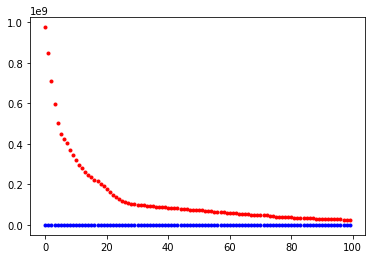

In [14]:
# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss = history.history['val_loss']

# y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_acc = history.history['acc']

# x값을 지정하고 정확도를 파랑색으로, 오차를 빨강색으로 표시
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()

In [15]:
modelPred = model.predict(x_test)
end = time.time() - start
print(round(end,4))
RMSE = sqrt(mean_squared_error(y_test, modelPred))
RMSE

13.6217


5827.624886236575

In [16]:
Y_prediction = modelPred.flatten()
for i in range(10):
    label = y_test.values[i]
    prediction = Y_prediction[i]
    print("실제가격: {:.3f}, 예상가격: {:.3f}".format(label, prediction))

실제가격: 34500.000, 예상가격: 32851.223
실제가격: 4830.000, 예상가격: 4029.843
실제가격: 32300.000, 예상가격: 29875.703
실제가격: 8900.000, 예상가격: 6758.728
실제가격: 51000.000, 예상가격: 49403.289
실제가격: 27500.000, 예상가격: 27836.709
실제가격: 15000.000, 예상가격: 13676.421
실제가격: 24200.000, 예상가격: 23587.172
실제가격: 55000.000, 예상가격: 52387.305
실제가격: 14750.000, 예상가격: 13873.280


Train on 6300 samples, validate on 4200 samples
Epoch 1/10
6300/6300 [==============================] - 0s 72us/step - loss: 967434189.2063 - acc: 0.0000e+00 - val_loss: 900216408.3810 - val_acc: 0.0000e+00

Epoch 00001: val_loss improved from inf to 900216408.38095, saving model to ./model/01-900216408.3810.hdf5
Epoch 2/10
6300/6300 [==============================] - 0s 9us/step - loss: 858255120.2540 - acc: 0.0000e+00 - val_loss: 795370508.1905 - val_acc: 0.0000e+00

Epoch 00002: val_loss improved from 900216408.38095 to 795370508.19048, saving model to ./model/02-795370508.1905.hdf5
Epoch 3/10
6300/6300 [==============================] - 0s 10us/step - loss: 754127036.9524 - acc: 1.5873e-04 - val_loss: 686718019.0476 - val_acc: 0.0000e+00

Epoch 00003: val_loss improved from 795370508.19048 to 686718019.04762, saving model to ./model/03-686718019.0476.hdf5
Epoch 4/10
6300/6300 [==============================] - 0s 10us/step - loss: 647756180.3175 - acc: 0.0000e+00 - val_loss: 585568

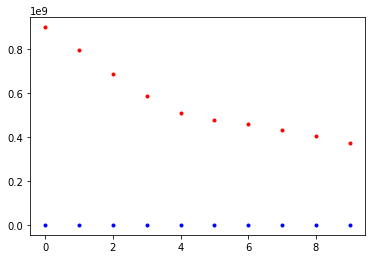

2.537


19870.954035971266

In [17]:
model = Sequential()
model.add(Dense(140, input_dim=14, activation='relu'))
model.add(Dense(35, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['accuracy'])

# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
# 모델 저장 조건 설정
modelpath = MODEL_DIR + '{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
# loss는 train loss고 val_loss는 validation loss임 / acc도 마찬가지

start = time.time()
history = model.fit(x_train, y_train, validation_split=0.4, epochs=10, batch_size=1000, callbacks=[checkpointer])
# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss = history.history['val_loss']

# y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_acc = history.history['acc']

# x값을 지정하고 정확도를 파랑색으로, 오차를 빨강색으로 표시
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()

modelPred = model.predict(x_test)
end = time.time() - start
print(round(end,4))
RMSE = sqrt(mean_squared_error(y_test, modelPred))
RMSE